In [1]:
import numpy as np
from pinocchio.utils import eye, rand, zero, skew, cross, rotate
import pinocchio as pin
import pickle

In [2]:
from example_robot_data import load

In [3]:
import example_robot_data
print(example_robot_data.__file__)

/opt/anaconda3/envs/pin3preview_casadi/lib/python3.9/site-packages/example_robot_data/__init__.py


In [4]:
robot = load('panda')

In [5]:
from pinocchio.visualize import MeshcatVisualizer
import pinocchio as pin

for name, inert in zip(robot.model.names, robot.model.inertias):
    print(name, inert)

In [6]:
qr = np.random.rand(9)

In [7]:
pin.forwardKinematics(robot.model, robot.data, qr)

In [8]:
for name, oMi in zip(robot.model.names, robot.data.oMi):
    print(("{:<24} : {: .2f} {: .2f} {: .2f}"
          .format( name, *oMi.translation.T.flat )))

universe                 :  0.00  0.00  0.00
panda_joint1             :  0.00  0.00  0.33
panda_joint2             :  0.00  0.00  0.33
panda_joint3             :  0.23  0.11  0.52
panda_joint4             :  0.24  0.17  0.46
panda_joint5             :  0.48  0.18  0.78
panda_joint6             :  0.48  0.18  0.78
panda_joint7             :  0.53  0.26  0.79
panda_finger_joint1      :  0.99  0.25  0.34
panda_finger_joint2      :  0.19  0.37  0.82


In [9]:
robot.forwardKinematics(qr)

In [10]:
v = zero(9)
tau = zero(9)

In [11]:
# Create a list of joints to lock
jointsToLock = ['panda_finger_joint1','panda_finger_joint2']
 
# Get the ID of all existing joints
jointsToLockIDs = []
for jn in jointsToLock:
    if robot.model.existJointName(jn):
        jointsToLockIDs.append(robot.model.getJointId(jn))
    else:
        print('Warning: joint ' + str(jn) + ' does not belong to the model!')

In [12]:
jointsToLockIDs

[8, 9]

In [13]:
reduced_robot = robot.buildReducedRobot(list_of_joints_to_lock=jointsToLockIDs)

In [14]:
#qr = np.random.rand(6)
qr = zero(6)
v = zero(6)
tau = zero(6)

In [15]:
qr = np.random.rand(7)
v = zero(7)
tau = zero(7)

In [16]:
pin.crba(reduced_robot.model, reduced_robot.data, qr)

array([[ 3.91668843e-01, -1.55496484e-01,  9.27432925e-02,
        -1.02843795e-01,  3.67832261e-02,  8.95011289e-04,
        -6.37360216e-03],
       [-1.55496484e-01,  2.63092551e+00, -1.60830799e-01,
        -9.86997671e-01, -1.23196547e-01, -1.33143388e-03,
         4.13557551e-03],
       [ 9.27432925e-02, -1.60830799e-01,  7.78440939e-02,
         5.52307125e-02,  3.46039444e-02,  1.95164814e-03,
        -5.53899639e-03],
       [-1.02843795e-01, -9.86997671e-01,  5.52307125e-02,
         6.11312225e-01,  5.69064747e-02, -1.97070122e-03,
        -1.75059922e-03],
       [ 3.67832261e-02, -1.23196547e-01,  3.46039444e-02,
         5.69064747e-02,  3.49461767e-02,  1.85731413e-03,
        -5.56150831e-03],
       [ 8.95011289e-04, -1.33143388e-03,  1.95164814e-03,
        -1.97070122e-03,  1.85731413e-03,  3.28154273e-02,
        -1.66656165e-03],
       [-6.37360216e-03,  4.13557551e-03, -5.53899639e-03,
        -1.75059922e-03, -5.56150831e-03, -1.66656165e-03,
         4.9096519

In [17]:
pin.rnea(reduced_robot.model, reduced_robot.data, qr, v, tau)

array([-7.77156117e-16, -1.60604128e+01,  8.62019930e-01,  7.19241128e-01,
        5.25085420e-01,  1.63127046e+00, -1.95212065e-02])

In [18]:
pin.rnea(reduced_robot.model, reduced_robot.data, qr, v, tau)

array([-7.77156117e-16, -1.60604128e+01,  8.62019930e-01,  7.19241128e-01,
        5.25085420e-01,  1.63127046e+00, -1.95212065e-02])

In [19]:
pin.aba(reduced_robot.model, reduced_robot.data, qr, v, tau)

array([ 22.89643614,  19.60488123, -18.91304134,  36.97456592,
       -12.31751856, -46.54943429, -20.72175207])

In [20]:
pin.aba(reduced_robot.model, reduced_robot.data, qr, v, tau)

array([ 22.89643614,  19.60488123, -18.91304134,  36.97456592,
       -12.31751856, -46.54943429, -20.72175207])

In [21]:
from roboticstoolbox.models.DH import Panda

panda = Panda()

In [22]:
tau

array([0., 0., 0., 0., 0., 0., 0.])

In [23]:
panda.accel(qr, v, tau)

array([ 14.24625115,  14.76737639, -14.02077003,  23.25510437,   0.97919787, -24.09763525,  -3.85491972])

In [24]:
panda.rne(qr, v, tau)

array([-2.48663328e-16, -1.67529029e+01,  5.99174563e-01,  1.24935501e+00,  2.02068071e-01,  6.18656820e-01,  0.00000000e+00])

## Casadi

In [25]:
import casadi as cas

In [26]:
import pinocchio.casadi as cpin

In [27]:
qr

array([0.40150413, 0.315712  , 0.47242973, 0.00929751, 0.63423865, 0.14789706, 0.92651718])

In [28]:
c_model = cpin.Model(reduced_robot.model)
c_data  = c_model.createData()

In [29]:
cpin.aba(c_model, c_data, cas.SX(qr), cas.SX(v), cas.SX(tau))

SX([22.8964, 19.6049, -18.913, 36.9746, -12.3175, -46.5494, -20.7218])

In [30]:
cpin.rnea(c_model, c_data, cas.SX(qr), cas.SX(v), cas.SX(tau))

SX([-7.77156e-16, -16.0604, 0.86202, 0.719241, 0.525085, 1.63127, -0.0195212])

In [31]:
n_q = 7
q_s = cas.SX.sym("q", n_q)
v_s = cas.SX.sym("v", n_q)
tau_s = cas.SX.sym("tau", n_q)
params = cas.SX.sym("p", 0)

In [32]:
tau_s

SX([tau_0, tau_1, tau_2, tau_3, tau_4, tau_5, tau_6])

In [33]:
acc_s = cpin.aba(c_model, c_data, q_s, v_s, tau_s)
u_s = cpin.rnea(c_model, c_data, q_s, v_s, tau_s)

In [34]:
dynam_g_q = cas.Function(
            "dynamics_g_q",
            [q_s.T, v_s.T, tau_s.T, params],
            [acc_s],
            ["q", "q_dot", "u", "params"],
            ["accel"],
        )

dynam_inv = cas.Function(
            "inverse_dynamics",
            [q_s.T, v_s.T, tau_s.T, params],
            [u_s],
            ["q", "q_dot", "a", "params"],
            ["tau"],
        )

In [35]:
dynam_g_q.__name__ = 'panda pinocchio function'

In [37]:
from chords.opti import Opti_Problem
import time
import matplotlib.pyplot as plt

In [38]:
from chords.piecewise import interpolated_array, interpolated_array_derivative, expand_G, interp_2d
from chords.analysis import dynamic_error_implicit, dynamic_error

In [39]:
dynam_f_x = expand_G(dynam_g_q, mode = 'casadi')

def dynam_f_x_t(x, u, params):
    return dynam_f_x(x, u, params).T

def dynam_f_x_np(x, u, params):
    return np.array(dynam_f_x(x, u, params)).flatten()

In [40]:
plt.style.use('default')

## Opti problem

In [41]:
def arr_sum(x):
    return np.sum(np.abs(x), axis = 1)

oct_fig_size = [10,6]

In [42]:
def panda_interp(results, scheme, n_graph = 2000):
    
    t_end = results['t'][-1]
    t_arr = np.linspace(0,t_end,n_graph)
    N = results['x'].shape[0]-1
    
    if 'hs'in scheme:
        scheme_params = {'u_c':results['u_c'],
                      'x_dot_c': results['x_d_c'],
                      'x_c': results['x_c']}
    else:
        scheme_params ={}
    
    if 'parab' in scheme:
        u_scheme = 'parab'
    else:
        u_scheme = 'lin'

    x_int, u_int = interpolated_array(
        X = results['x'],
        U = results['u'],
        h = t_end/N,
        t_array= t_arr,
        params=(),
        X_dot=results['x_d'],
        scheme=scheme,
        u_scheme=u_scheme,
        scheme_params=scheme_params,
    )
    return x_int, u_int
    
def panda_results_plot(results, scheme, n_graph = 2000):
    t_end = results['t'][-1]
    t_arr = np.linspace(0,t_end,n_graph)
    
    x_int, u_int = panda_interp(results, scheme, n_graph = 2000)
    
    q_int = x_int[:,:7]
    v_int = x_int[:,7:]
    plt.figure(figsize=[16,10])
    for ii in range(q_int.shape[1]):
        plt.plot(results['t'],results['q'][:,ii],'o', c = f'C{ii}')
        if 'hs'in scheme:
            plt.plot(results['t_c'],results['q_c'][:,ii],'o', c = f'C{ii}')

    #plt.plot(results['t'],q_init,'o')
    for ii in range(7):
        plt.plot(t_arr, q_int[:,ii], label = 'q_'+str(ii), c = f'C{ii}')
    plt.grid()
    plt.legend()
    
def panda_results_plot_v(results, scheme, n_graph = 2000):
    t_end = results['t'][-1]
    t_arr = np.linspace(0,t_end,n_graph)
    
    x_int, u_int = panda_interp(results, scheme, n_graph = 2000)
    
    q_int = x_int[:,:7]
    v_int = x_int[:,7:]
    plt.figure(figsize=[16,10])
    plt.plot(results['t'],results['v'],'o')
    if 'hs'in scheme:
        plt.plot(results['t_c'],results['v_c'],'o')

    #plt.plot(results['t'],q_init,'o')
    for ii in range(7):
        plt.plot(t_arr, v_int[:,ii], label = 'v_'+str(ii))
    plt.grid()
    plt.legend()

def panda_results_plot_u(results, scheme, n_graph = 2000):
    t_end = results['t'][-1]
    t_arr = np.linspace(0,t_end,n_graph)
    
    x_int, u_int = panda_interp(results, scheme, n_graph = 2000)
    
    q_int = x_int[:,:7]
    v_int = x_int[:,7:]
    plt.figure(figsize=[16,10])
    plt.plot(results['t'],results['u'],'o')
    if 'hs'in scheme:
        plt.plot(results['t_c'],results['u_c'],'o')

    #plt.plot(results['t'],q_init,'o')
    for ii in range(7):
        plt.plot(t_arr, u_int[:,ii], label = 'u_'+str(ii))
    plt.grid()
    
def plot_init_arrays(results, waypoints, n_graph = 2000):
    t_end = results['t'][-1]
    t_arr = results['t']
    N = results['x'].shape[0]-1
    q_init, v_init, a_init, u_init = init_arrays(N, t_end, waypoints)
    for ii in range(q_init.shape[1]):
        plt.plot(t_arr, q_init[:,ii], marker = 'o', c = f'C{ii}')

In [43]:
def set_fixed_positions(_opti, pose_0, pose_1, v_mult = 1, v_x_end = 1, v_z_end = 0, block_wrist=True):
    
    from roboticstoolbox.models.DH import Panda
    panda = Panda()
    
    jacmat = panda.jacob0(q = pose_1, half = 'trans')

    q_s = _opti.opti_points['q_s']
    q_e = _opti.opti_points['q_e']
    v_s = _opti.opti_points['v_s']
    v_e = _opti.opti_points['v_e']
    
    q_arr = _opti.opti_arrs['q']

    v_eff_cart_e = cas.MX(jacmat)@v_e.T

    _opti.opti.subject_to(q_s == np.expand_dims(pose_0, 0))
    _opti.opti.subject_to(q_e == np.expand_dims(pose_1, 0))
    
    # Bloquear Muñeca
    if block_wrist:
        wrist_arr = np.linspace(pose_0[-1], pose_1[-1], _opti.N +1)
        _opti.opti.subject_to(q_arr[:,-1] == wrist_arr)
        try: 
            q_c_arr = _opti.opti_arrs['q_c']
            wrist_arr_c = (wrist_arr[1:]+wrist_arr[:-1])/2
            _opti.opti.subject_to(q_c_arr[:,-1] == wrist_arr_c)
        except KeyError:
            pass

    _opti.opti.subject_to(v_s == 0)
    #_opti.opti.subject_to(v_e == 0)
    _opti.opti.subject_to(v_eff_cart_e[1] == 0)
    _opti.opti.subject_to(v_eff_cart_e[2] == v_z_end)
    if v_mult == 0:
        _opti.opti.subject_to(v_eff_cart_e[0] == v_x_end)
    
    return v_eff_cart_e

In [44]:
def trans_concatenate(*arr_list):
    new_arr_list = [np.expand_dims(ii, 0) for ii in arr_list]
    return np.concatenate(new_arr_list, axis = 0)
    

In [45]:
def init_arrays(N, t_end, poses):
    u_init = np.zeros([N+1, 7])
    
    if type(poses) not in (list, tuple) :
        poses = [poses, poses] #poses sólo era pose inicial y final
    poses_arr = trans_concatenate(*poses)
    
    old_tau_arr = np.linspace(0,t_end,poses_arr.shape[0])
    new_tau_arr = np.linspace(0,t_end,N+1)
    
    q_init = interp_2d(new_tau_arr, old_tau_arr, poses_arr)
    v_init = np.gradient(q_init, new_tau_arr, axis=0)
    a_init = np.gradient(v_init, new_tau_arr, axis=0)
        
    for ii in range(N+1):
        u_init[ii,:] = dynam_inv(q_init[ii,:], v_init[ii,:], a_init[ii,:],()).T
        
    return q_init, v_init, a_init, u_init

In [46]:
def int_sq_parab_step(a, b, c):
    return 2*a**2 + 2*a*b - a*c + 8*b**2 + 2*b*c + 2*c**2

def int_sq_parab_deriv_step(a, b, c):
    return 7*a**2 -16*a*b + 2*a*c + 16*b**2 + -16*b*c + 7*c**2

def int_sq_parab(u, u_c, dt, N):
    h = dt/N
    r = 0
    for ii in range(N):
        r = r+int_sq_parab_step(u[ii,:], u_c[ii,:], u[ii+1,:])
    r = h*r/15
    return cas.sum2(r)

def int_sq_parab_deriv(u, u_c, dt, N):
    h = dt/N
    r = 0
    for ii in range(N):
        r = r+int_sq_parab_deriv_step(u[ii,:], u_c[ii,:], u[ii+1,:])
    r = r/(3*h)
    return cas.sum2(r)
    
def integ_parab(U, U_c, dt, N):
    return dt * cas.sum2(
            (
                4 * cas.sum1(U_c[:, :] ** 2)
                + cas.sum1(U[:, :] ** 2)
                + cas.sum1(U[1:-1, :] ** 2)
            )
            / (3 *N)
        )
def integr_equi(_opti, arr_name):
    
    U = _opti.opti_arrs[arr_name]
    dt = _opti.t_end - _opti.t_start
    try:
        U_c = _opti.opti_arrs[arr_name+'_c']
        cost = int_sq_parab(U, U_c, dt,  _opti.N)
        #print('U_c:', U_c)
    except KeyError:
        cost = dt * cas.sum2(
            (cas.sum1(U[:, :] ** 2) + cas.sum1(U[1:-1, :] ** 2)+ cas.sum1(U[1:, :] * U[:-1, :])) / (3*_opti.N)
        )
    return cost

def integr_equi_old(_opti, arr_name):
    
    U = _opti.opti_arrs[arr_name]
    dt = _opti.t_end - _opti.t_start
    try:
        U_c = _opti.opti_arrs[arr_name+'_c']
        cost = integ_parab(U, U_c, dt,  _opti.N)
        #print('U_c:', U_c)
    except KeyError:
        cost = dt * cas.sum2(
            (cas.sum1(U[:, :] ** 2) + cas.sum1(U[1:-1, :] ** 2)) / (2*_opti.N)
        )
    return cost

def integr_equi_deriv(_opti, arr_name):
    
    U = _opti.opti_arrs[arr_name]
    dt = _opti.t_end - _opti.t_start
    try:
        U_c = _opti.opti_arrs[arr_name+'_c']
        cost = int_sq_parab_deriv(U, U_c, dt,  _opti.N)
        #print('U_c:', U_c)
    except KeyError:
        h = dt/_opti.N
        a = U[:-1, :]
        b = U[1:, :]
        cost = cas.sum2(
            (cas.sum1(a**2 + b**2 - 2*a*b))
        )/h
    return cost

def horz_v_cost(
    _opti,
    v_eff_cart_e,
    N,
    acc_mult = 0.03,
    u_mult = 0.03,
    v_mult = 1.,
    dq_mult = 0,
    qdot_mult = 0,
    ud_mult = 0,
):
    acc_int = integr_equi(_opti, 'a')
    u_int = integr_equi(_opti, 'u')
    ud_int = integr_equi_deriv(_opti, 'u')
    qdot_int = integr_equi(_opti, 'v')
    cost = -v_eff_cart_e[0] * v_mult + acc_int*acc_mult + u_int*u_mult + ud_int*ud_mult
    _opti.cost = cost
    _opti.opti.minimize(cost)

def horz_v_cost_old(
    _opti,
    v_eff_cart_e,
    N,
    acc_mult = 0.03,
    u_mult = 0.03,
    v_mult = 1.,
    dq_mult = 0,
    qdot_mult = 0,
    ud_mult = 0,
):
    acc_int = integr_equi_old(_opti, 'a')
    u_int = integr_equi_old(_opti, 'u')
    ud_int = integr_equi_deriv(_opti, 'u')
    qdot_int = integr_equi_old(_opti, 'v')
    cost = -v_eff_cart_e[0] * v_mult + acc_int*acc_mult + u_int*u_mult + ud_int*ud_mult
    _opti.cost = cost
    _opti.opti.minimize(cost)

In [47]:
def robot_limits(_opti, tau_safety_factor = 0.5, speed_safety_factor = 0.5):
    
    from roboticstoolbox.models.DH import Panda
    panda = Panda()
    
    q_arr = _opti.opti_arrs['q']
    v_arr = _opti.opti_arrs['v']
    u_arr = _opti.opti_arrs['u']

    q_dot_max = np.zeros(7)
    q_dot_max[0:4] = 2.1750
    q_dot_max[4:7] = 2.6100

    tau_max = np.zeros(7)
    tau_max[0:4] = 87
    tau_max[4:7] = 12

    q_dot_max = q_dot_max*speed_safety_factor
    tau_max = tau_max*tau_safety_factor

    for ii in range(7):
        _opti.opti.subject_to(panda.qlim[:,ii][0] <= q_arr[:,ii])
        _opti.opti.subject_to(panda.qlim[:,ii][1] >= q_arr[:,ii])

        _opti.opti.subject_to(-q_dot_max[ii] <= v_arr[:,ii])
        _opti.opti.subject_to( q_dot_max[ii] >= v_arr[:,ii])


        _opti.opti.subject_to(-tau_max[ii] <= u_arr[:,ii])
        _opti.opti.subject_to( tau_max[ii] >= u_arr[:,ii])
    try: 
        q_arr_c = _opti.opti_arrs['q_c']
        v_arr_c = _opti.opti_arrs['v_c']
        u_arr_c = _opti.opti_arrs['u_c']
        
        for ii in range(7):
            _opti.opti.subject_to(panda.qlim[:,ii][0] <= q_arr_c[:,ii])
            _opti.opti.subject_to(panda.qlim[:,ii][1] >= q_arr_c[:,ii])

            _opti.opti.subject_to(-q_dot_max[ii] <= v_arr_c[:,ii])
            _opti.opti.subject_to( q_dot_max[ii] >= v_arr_c[:,ii])

            _opti.opti.subject_to(-tau_max[ii] <= u_arr_c[:,ii])
            _opti.opti.subject_to( tau_max[ii] >= u_arr_c[:,ii])
        
    except KeyError:
        pass

In [48]:
def panda_throw(
    scheme,
    N,
    dynam_g_q=dynam_g_q,
    ini_guess='custom',
    solve_repetitions = 1,
    t_end = 3,
    verbose = False,
    silent = True,
    waypoints = np.array([ 0.,  -np.pi/4,  0, -np.pi/2,  0., np.pi/4,  0. ]),
    acc_mult = 0.03,
    u_mult = 0.03,
    ud_mult = 0,
    v_mult = 1.,
    tau_safety_factor = 0.5, 
    speed_safety_factor = 0.5,
    v_x_end = 0.877,
    v_z_end = 0.,
    block_wrist = True,
    integr_funcs = 'new'
):
    
    _opti = Opti_Problem(
        LM=dynam_g_q,
        params = (),
        scheme = scheme,
        ini_guess= ini_guess,
        t_end = t_end,
        verbose=verbose,
        silent=silent,
        )
    
    _opti.dynamic_setup('g_q',7,7)
    _opti.opti_setup(N, tol = 1e-13)
    _opti.apply_scheme()
    
    v_eff_cart_e = set_fixed_positions(_opti, pose_0, pose_1, v_mult, v_x_end, v_z_end, block_wrist)

    q_init, v_init, a_init, u_init = init_arrays(N, t_end, waypoints)
    if ini_guess == 'custom':
        _opti.initial_guess(q_init, v_init, a_init, u_init)
    elif ini_guess == 'zero':
        _opti.initial_guess()
    else:
        raise NotImplementedError('implementar cond inits para este caso')
    
    if integr_funcs == 'new':
        horz_v_cost(_opti, v_eff_cart_e, N, acc_mult = acc_mult, u_mult = u_mult, v_mult = v_mult, ud_mult = ud_mult)
    elif integr_funcs == 'old':
        horz_v_cost_old(_opti, v_eff_cart_e, N, acc_mult = acc_mult, u_mult = u_mult, v_mult = v_mult, ud_mult = ud_mult)
    else:
        raise NotImplementedError('integr_funcs must be "new" or "old"')
        #_opti.u_sq_cost()
    
    robot_limits(_opti,
                 tau_safety_factor = tau_safety_factor,
                 speed_safety_factor = speed_safety_factor)
    
    _opti.chrono_solve(solve_repetitions=solve_repetitions,)
    return _opti.results

In [49]:
def end_eff(q_arr, tool_l = 0.103):
    from roboticstoolbox.models.DH import Panda
    panda = Panda()
    panda.tool.t[2] = tool_l
    
    l = q_arr.shape[0]
    result = np.zeros([l,3])
    for ii in range(l):
        config = panda.fkine(q_arr[ii,:])
        result[ii,:] = config.t
    return result

def tray_nodes(q_arr, tool_l = 0.103):
    from roboticstoolbox.models.DH import Panda
    panda = Panda()
    panda.tool.t[2] = tool_l
    
    l = q_arr.shape[0]
    result = np.zeros([9,l,3])
    for ii in range(l):
        config = panda.fkine_all(q_arr[ii,:])
        for jj in range(8):
            result[jj,ii,:] = config[jj].t
    result[-1,:,:] = end_eff(q_arr, tool_l)
    return result

In [50]:
ref_s3 = panda.fkine(np.zeros(7))
ref_s3

   0.7071    0.7071    0         0.088     
   0.7071   -0.7071    0         0         
   0         0        -1         0.823     
   0         0         0         1         


In [51]:
panda.qlim

array([[-2.8973, -1.7628, -2.8973, -3.0718, -2.8973, -0.0175, -2.8973],
       [ 2.8973,  1.7628,  2.8973, -0.0698,  2.8973,  3.7525,  2.8973]])

In [52]:
# Problema 1
pose_0 = np.array([ 0.,  -np.pi/4,  0, -np.pi/2,  0., np.pi/4,  0. ])
pose_1 = np.array([ 0.,  -np.pi/4,  0, -np.pi/2,  0., np.pi/4,  0. ])
pose_c = np.array([ 0.,  -np.pi/2,  0, -np.pi/1.2,  0., 0.,  0. ])
# Problema 2
pose_0 = np.array([ -np.pi/4,  0.3,  0, -2.5,  0., 2.8,  0. ])
pose_1 = np.array([ -np.pi/4, -0.1,  0, -1.3,  0., 1.2,  0. ])
pose_c = np.array([ -3*np.pi/4, -1. ,  0, -2.5,  0., 0.,  0. ])
# Problema 3
pose_0 = np.array([ 160.,  52.4,  0, -65.3,  0., 108.2,  45. ])*np.pi/180
pose_1 = np.array([ 0.,  -72.1,  0, -74.,  0., 151.5,  45. ])*np.pi/180
pose_c = np.array([ -24.1,  52.4,  0, -65.3,  0., 108.2,  45. ])*np.pi/180
# Problema 4
pose_0 = np.array([ 0.,  -35.,  0, -63.,  0., 162.,  45. ])*np.pi/180
pose_1 = np.array([ 0.,  -35.,  0, -63.,  0., 162.,  45.  ])*np.pi/180
pose_c = np.array([ 1.70784554, -1.63272005, -1.61000295, -2.52716051,  1.48143068,  1.81098497,  0.78539816])
pose_q1 = np.array([ 1.51967946, -0.81165248, -0.20204314, -1.85077598,  0.56798175,  2.39457482,  0.78539816])
pose_q3 = np.array([-0.07808835, -1.7664135 , -2.84682931, -0.85613278,  1.00210382,  2.08492597,  0.78539747])

_x_interp, u_interp = panda_interp(_results, _scheme, n_graph = _n_graph)
_x_interp[500,:7]

panda_results_plot(_results, scheme = _scheme)
plot_init_arrays(_results, [pose_0, pose_q1, pose_c, pose_q3, pose_1])

#plot_init_arrays(_results, pose_0, pose_1, pose_c, pose_q1 = None, pose_q3=None)

In [53]:
panda.fkine(pose_0)

  -0.6947    0         0.7193    0.0837    
   0        -1         0         0         
   0.7193    0         0.6947    1.226     
   0         0         0         1         


In [54]:
panda.fkine(pose_1)

  -0.6947    0         0.7193    0.0837    
   0        -1         0         0         
   0.7193    0         0.6947    1.226     
   0         0         0         1         


In [55]:
panda.fkine(pose_c)

   0.4535   -0.8878    0.07803   0.4305    
   0.866     0.4597    0.1967    0.1199    
  -0.2105   -0.02164   0.9773    0.5021    
   0         0         0         1         


In [56]:
def panda_with_mass(m_end):
    robot = load('panda')
    robot.model.inertias[9].mass = m_end
    jointsToLock = ['panda_finger_joint1','panda_finger_joint2']
    jointsToLockIDs = [robot.model.getJointId(jn) for jn in jointsToLock]
    reduced_robot = robot.buildReducedRobot(list_of_joints_to_lock=jointsToLockIDs)
    
    c_model = cpin.Model(reduced_robot.model)
    c_data  = c_model.createData()
    
    n_q = 7
    q_s = cas.SX.sym("q", n_q)
    v_s = cas.SX.sym("v", n_q)
    tau_s = cas.SX.sym("tau", n_q)
    params = cas.SX.sym("p", 0)
    
    acc_s = cpin.aba(c_model, c_data, q_s, v_s, tau_s)
    u_s = cpin.rnea(c_model, c_data, q_s, v_s, tau_s)
    
    dynam_g_q = cas.Function(
                "dynamics_g_q",
                [q_s.T, v_s.T, tau_s.T, params],
                [acc_s],
                ["q", "q_dot", "u", "params"],
                ["accel"],
            )

    dynam_inv = cas.Function(
                "inverse_dynamics",
                [q_s.T, v_s.T, tau_s.T, params],
                [u_s],
                ["q", "q_dot", "a", "params"],
                ["tau"],
            )
    dynam_g_q.__name__ = 'panda pinocchio function'
    dynam_f_x = expand_G(dynam_g_q, mode = 'casadi')

    def dynam_f_x_t(x, u, params):
        return dynam_f_x(x, u, params).T

    def dynam_f_x_np(x, u, params):
        return np.array(dynam_f_x(x, u, params)).flatten()
    return dynam_g_q, dynam_inv, dynam_f_x

In [57]:
def get_waypoints(N_waypoints, results, scheme):
    _x_interp, u_interp = panda_interp(results, scheme, n_graph = 2000)
    old_tau_arr = np.linspace(0,1,2000)
    new_tau_arr = np.linspace(0,1,N_waypoints)
    
    way_arr = interp_2d(new_tau_arr, old_tau_arr, _x_interp[:,:7])
    return [way_arr[ii,:] for ii in range(N_waypoints)]

In [58]:
def cart_v(q_p, qdot):
    jacmat = panda.jacob0(q = q_p, half = 'trans')
    return jacmat@ qdot

### Problema interesante:
    
    
    acc_mult = 0.01,
    u_mult = 0.1,
    v_mult = 0,
    tau_safety_factor = 0.5, 
    speed_safety_factor = 100.,
    v_x_end = -5
    v_z_end = 1
    
    o
    
    v_z_end = 0
    
    o
    
    
    _scheme,
    _N,
    t_end = 1,
    ini_guess='zero',
    dynam_g_q=dynam_g_q,
    pose_0=pose_0,
    pose_1=pose_1,
    pose_c=pose_c,
    verbose=True,
    silent=False,
    acc_mult = 0.1,
    u_mult = 1,
    v_mult = 0,
    tau_safety_factor = 0.5, 
    speed_safety_factor = 100.,
    v_x_end = 10,
    v_z_end = 0,

In [59]:
from numpy import array

In [60]:
_waypoints=[pose_0, pose_q1, pose_c, pose_q3, pose_1]

In [61]:
_waypoints=[pose_0,pose_c, pose_1]

In [62]:
_waypoints=[
    np.array([-2.53248555e-18, -6.10865238e-01,  2.03330713e-18, -1.09955743e+00, -1.92375017e-17,  2.82743339e+00,  7.85398163e-01]),
    np.array([ 0.30583642, -0.75883029, -0.0123181 , -1.45006794,  0.14921203,  2.77335844,  0.78539816]),
    np.array([ 0.71864944, -1.10033124, -0.14982473, -2.11463378,  0.50155305,  2.49920923,  0.78539816]),
    np.array([ 0.8683679 , -1.49151222, -0.54356741, -2.68868848,  0.91885907,  2.21167765,  0.78539816]),
    np.array([ 0.68549687, -1.71073009, -1.44017257, -2.96921424,  1.17315848,  2.12817671,  0.78539816]),
    np.array([ 0.2057914 , -1.76279983, -2.51395443, -2.79104403,  1.17153408,  2.23499779,  0.78539816]),
    np.array([-0.62735565, -1.7588055 , -2.89729679, -2.05852038,  0.75166333,  2.52090991,  0.78539816]),
    np.array([-1.08140563, -1.73649547, -2.39463151, -1.56691404, -0.1384569 ,  2.71148205,  0.78539816]),
    np.array([-1.17087851, -1.56442135, -1.71222247, -1.67380114, -0.80884129,  3.11987876,  0.78539816]),
    np.array([-0.8036383 , -1.40529462, -0.71376265, -1.70380909, -0.52998094,  3.74259331,  0.78539816]),
    np.array([ 2.53248554e-18, -6.10865238e-01,  8.42091408e-16, -1.09955743e+00,  2.79786631e-16,  2.82743339e+00,  7.85398163e-01])
]

In [63]:
_waypoints = [
    array([ 2.59721776e-27, -6.10865238e-01, -6.59678098e-27, -1.09955743e+00, -7.01956440e-28,  2.82743339e+00,  7.85398163e-01]),
    array([ 0.03318641, -0.65533581, -0.01895189, -1.19384492,  0.0193124 ,  2.80970588,  0.78539816]),
    array([ 0.10479664, -0.77204482, -0.06537078, -1.43521564,  0.07237986,  2.76265939,  0.78539816]),
    array([ 0.18009345, -0.93363446, -0.12948023, -1.75623983,  0.15242625,  2.696461  ,  0.78539816]),
    array([ 0.23741408, -1.11446825, -0.21774093, -2.09791078,  0.25391364,  2.62159785,  0.78539816]),
    array([ 0.2655529 , -1.2953805 , -0.35152742, -2.42138342,  0.37231145,  2.54823617,  0.78539816]),
    array([ 0.2576012 , -1.46088376, -0.56556902, -2.70159918,  0.50463561,  2.48683514,  0.78539816]),
    array([ 0.21148571, -1.59449722, -0.89314686, -2.91493985,  0.64925608,  2.44844793,  0.78539816]),
    array([ 0.13672932, -1.68383298, -1.32415222, -3.0402065 ,  0.80116289,  2.44165337,  0.78539816]),
    array([ 0.04676345, -1.73216169, -1.79663581, -3.07179854,  0.94791124,  2.4703197 ,  0.78539816]),
    array([-0.0586584 , -1.75395693, -2.24228862, -3.01373081,  1.07484951,  2.53567791,  0.78539816]),
    array([-0.18911152, -1.76183318, -2.59819928, -2.86858801,  1.16968866,  2.63439689,  0.78539816]),
    array([-0.34977632, -1.76280002, -2.81937401, -2.65151017,  1.22425032,  2.76237975,  0.78539816]),
    array([-0.53161718, -1.76260011, -2.89753408, -2.39169664,  1.23492679,  2.91463068,  0.78539816]),
    array([-0.71440901, -1.76177053, -2.84742554, -2.13749741,  1.2004481 ,  3.07743144,  0.78539816]),
    array([-0.88343718, -1.76252107, -2.68273543, -1.94279383,  1.12771601,  3.23973502,  0.78539816]),
    array([-1.02226671, -1.76150882, -2.43540217, -1.84753994,  1.02769241,  3.39501595,  0.78539816]),
    array([-1.11399809, -1.74618373, -2.14954398, -1.8594025 ,  0.91012187,  3.532767  ,  0.78539816]),
    array([-1.15037095, -1.70947985, -1.84928773, -1.93513174,  0.78041306,  3.64115524,  0.78539816]),
    array([-1.12560729, -1.65969944, -1.52453308, -2.00373744,  0.63976651,  3.71292849,  0.78539816]),
    array([-1.02527927, -1.60174537, -1.16097953, -2.00727425,  0.48994007,  3.74788071,  0.78539816]),
    array([-0.83229856, -1.51079687, -0.76444648, -1.92179173,  0.33677671,  3.74770129,  0.78539816]),
    array([-0.55784722, -1.32967451, -0.37803996, -1.75424496,  0.19177555,  3.66280047,  0.78539819]),
    array([-0.25971695, -1.02179992, -0.09231741, -1.50482242,  0.07251543,  3.39122445,  0.78539704]),
    array([-2.23060949e-27, -6.10865238e-01,  4.70899401e-26, -1.09955743e+00,  1.59972053e-26,  2.82743339e+00,  7.85398163e-01])
]

In [64]:
# Obtenidos tras optimización con Trapz N=50 v = (0,0,10), acc_mult = 0.01, u_mult = 0.1
_waypoints = [
    array([ 1.13314891e-27, -6.10865238e-01, -2.70165325e-27, -1.09955743e+00,  7.85935718e-28,  2.82743339e+00,  7.85398163e-01]),
    array([ 0.03910909, -0.62204965,  0.0067167 , -1.12853645,  0.01095363,  2.8134737 ,  0.78539816]),
    array([ 0.14413183, -0.65412596,  0.01985887, -1.21125943,  0.04318099,  2.773261  ,  0.78539816]),
    array([ 0.29255564, -0.70464236,  0.02662502, -1.33900358,  0.0953126 ,  2.71020772,  0.78539816]),
    array([ 0.46341983, -0.77184965,  0.01870845, -1.50136282,  0.16528477,  2.6282955 ,  0.78539816]),
    array([ 0.6386395 , -0.85432667, -0.00625189, -1.68685697,  0.25026005,  2.53197526,  0.78539816]),
    array([ 0.80336042, -0.9503445 , -0.04775965, -1.88408886,  0.34685579,  2.42609029,  0.78539816]),
    array([ 0.94643356, -1.05761067, -0.10614345, -2.08336514,  0.45149826,  2.31567361,  0.78539816]),
    array([ 1.06007704, -1.17315415, -0.18509771, -2.27733054,  0.56072665,  2.20584866,  0.78539816]),
    array([ 1.1389266 , -1.29292705, -0.29265896, -2.46025393,  0.6714151 ,  2.10192199,  0.78539816]),
    array([ 1.1793644 , -1.41103233, -0.44088244, -2.62667453,  0.78093222,  2.00961825,  0.78539816]),
    array([ 1.18013599, -1.51955479, -0.64213777, -2.77028287,  0.88725882,  1.93491335,  0.78539816]),
    array([ 1.14363469, -1.61038475, -0.90169016, -2.88383066,  0.98863152,  1.88325194,  0.78539816]),
    array([ 1.07545018, -1.67836006, -1.21227344, -2.96018764,  1.08267157,  1.85879083,  0.78539816]),
    array([ 0.98071674, -1.72338607, -1.55612433, -2.99350004,  1.16559721,  1.86457485,  0.78539816]),
    array([ 0.85987893, -1.74911639, -1.91210685, -2.97838341,  1.23211264,  1.90365343,  0.78539816]),
    array([ 0.7083435 , -1.76033484, -2.25704977, -2.90759127,  1.27560996,  1.97922676,  0.78539816]),
    array([ 0.51934918, -1.76272561, -2.55980063, -2.77089085,  1.28821769,  2.09332675,  0.78539816]),
    array([ 0.29087751, -1.76280038, -2.78125703, -2.5596294 ,  1.2618496 ,  2.24476475,  0.78539816]),
    array([ 0.03926576, -1.76279802, -2.89144774, -2.28055934,  1.18994127,  2.42615784,  0.78539816]),
    array([-0.19780354, -1.76269758, -2.88369006, -1.96346782,  1.06924308,  2.62472451,  0.78539816]),
    array([-0.38628734, -1.76284667, -2.76503837, -1.65397646,  0.90473792,  2.83237755,  0.78539816]),
    array([-0.52051956, -1.76127711, -2.53273218, -1.39760876,  0.70969661,  3.04856929,  0.78539816]),
    array([-0.6041241 , -1.74847659, -2.19049359, -1.24007639,  0.50090253,  3.26663138,  0.78539816]),
    array([-0.6410075 , -1.72189549, -1.76522288, -1.2051067 ,  0.29754152,  3.47232226,  0.78539816]),
    array([-0.62333695, -1.68670397, -1.29341873, -1.27738098,  0.11817121,  3.64376429,  0.78539816]),
    array([-0.53073283, -1.61800426, -0.81709643, -1.41122168, -0.0201482 ,  3.74754582,  0.78539816]),
    array([-0.3648461 , -1.45009688, -0.39309744, -1.52628113, -0.1001212 ,  3.72432869,  0.78539816]),
    array([-0.17080774, -1.12213525, -0.09903079, -1.4921979 , -0.10125933,  3.46358256,  0.78539816]),
    array([-1.03183935e-27, -6.10865238e-01, -5.72042633e-26, -1.09955743e+00, -1.49546942e-26,  2.82743339e+00,  7.85398163e-01])
]

In [65]:
# Obtenidos tras optimización con Trapz N=50 v = (0,0,10), u_mult = 1, ud_mult = 0.1
_waypoints = [
    array([-3.16119251e-23, -6.10865238e-01,  2.81443677e-24, -1.09955743e+00, -5.27997450e-24,  2.82743339e+00,  7.85398163e-01]),
    array([ 0.0232333 , -0.62939971, -0.01244924, -1.12573254, -0.03779456,  2.74812233,  0.78539816]),
    array([ 0.08604222, -0.6820839 , -0.04243058, -1.19432052, -0.14423251,  2.50546491,  0.78539816]),
    array([ 0.17253487, -0.76075682, -0.07337686, -1.28544719, -0.2886252 ,  2.10165329,  0.78539816]),
    array([ 0.26349678, -0.85639221, -0.09810784, -1.39464568, -0.40679227,  1.5905976 ,  0.78539816]),
    array([ 0.33832214, -0.96589554, -0.13034408, -1.53744183, -0.44193385,  1.07137638,  0.78539816]),
    array([ 0.38174948, -1.0911962 , -0.18786909, -1.72773375, -0.3832384 ,  0.6215323 ,  0.78539816]),
    array([ 0.38800766, -1.23217165, -0.27883726, -1.96470851, -0.25260645,  0.2783531 ,  0.78539816]),
    array([ 0.35740533, -1.38308989, -0.40988861, -2.23290217, -0.08174901,  0.06111347,  0.78539816]),
    array([ 0.29114325, -1.53277154, -0.59861467, -2.50831208,  0.09861031, -0.01978304,  0.78539816]),
    array([ 0.18926064, -1.66266937, -0.88070513, -2.76308418,  0.25161813,  0.0379777 ,  0.78539816]),
    array([ 0.06079674, -1.74473564, -1.2956751 , -2.96175159,  0.32184091,  0.22952909,  0.78539816]),
    array([-0.05903632, -1.76413865, -1.82138771, -3.06504558,  0.28511819,  0.54163869,  0.78539816]),
    array([-0.14262678, -1.75253288, -2.32943742, -3.06346656,  0.23688639,  0.95928323,  0.78539816]),
    array([-0.21884167, -1.74343032, -2.68771608, -2.99723933,  0.31421637,  1.49070358,  0.78539816]),
    array([-0.31905158, -1.73227509, -2.86224075, -2.89925161,  0.53717009,  2.13217812,  0.78539816]),
    array([-0.43270318, -1.71190283, -2.89979911, -2.7458536 ,  0.79639653,  2.77188632,  0.78539816]),
    array([-0.52647623, -1.68401816, -2.87277976, -2.51009472,  0.98766383,  3.26556689,  0.78539816]),
    array([-0.57715687, -1.66296611, -2.81559498, -2.18806295,  1.15226223,  3.57633909,  0.78539816]),
    array([-0.56581998, -1.66763822, -2.75377067, -1.76291943,  1.38116528,  3.73010978,  0.78539816]),
    array([-0.47732943, -1.7088014 , -2.73448154, -1.20598481,  1.75090705,  3.73700696,  0.78539816]),
    array([-0.3474871 , -1.75998778, -2.83407589, -0.5995202 ,  2.30956788,  3.52931543,  0.78539816]),
    array([-0.29100099, -1.735937  , -2.90187685, -0.23930856,  2.78997782,  3.05418812,  0.78539816]),
    array([-0.34899035, -1.61701713, -2.47962485, -0.26367629,  2.59791203,  2.35510823,  0.78539816]),
    array([-0.5224038 , -1.59749583, -1.54984383, -0.59498501,  1.65484655,  2.00343621,  0.78539816]),
    array([-0.60605864, -1.73196562, -0.79279538, -1.14142106,  0.87314464,  2.57189303,  0.78539816]),
    array([-0.52828411, -1.73936165, -0.40769624, -1.59603274,  0.48339745,  3.29472497,  0.78539816]),
    array([-0.39126161, -1.53396649, -0.17920537, -1.77999456,  0.23088199,  3.71308377,  0.78539816]),
    array([-0.24147713, -1.15633418, -0.03864335, -1.66885475,  0.06183061,  3.66032332,  0.78539816]),
    array([ 3.15592609e-23, -6.10865238e-01,  3.54077190e-22, -1.09955743e+00, -5.84843812e-22,  2.82743339e+00,  7.85398163e-01])
]

In [66]:
# Obtenidos tras optimización recursiva con hs_mod_parab N=40 v = (0,0,10)
_waypoints = [
    array([ 6.42660183e-27, -6.10865238e-01, -1.53053032e-27, -1.09955743e+00, -1.39449201e-27,  2.82743339e+00,  7.85398163e-01]),
    array([ 0.04245906, -0.61968777,  0.00902092, -1.12432694,  0.01100683,  2.81296085,  0.78539816]),
    array([ 0.15366427, -0.64496264,  0.02684135, -1.19521903,  0.04322195,  2.77154599,  0.78539816]),
    array([ 0.31107744, -0.68531655,  0.03832707, -1.30654762,  0.09546256,  2.70642776,  0.78539816]),
    array([ 0.49415494, -0.74047999,  0.03320941, -1.45085159,  0.16586955,  2.62137469,  0.78539816]),
    array([ 0.68463911, -0.81068297,  0.00852096, -1.61882239,  0.2516379 ,  2.52074817,  0.78539816]),
    array([ 0.8670274 , -0.89562534, -0.03426528, -1.80046969,  0.34930084,  2.40934613,  0.78539816]),
    array([ 1.02896628, -0.99395888, -0.09343319, -1.98671319,  0.45512398,  2.29220823,  0.78539816]),
    array([ 1.16139019, -1.10321484, -0.17002875, -2.17035125,  0.56542493,  2.17448609,  0.78539816]),
    array([ 1.25818925, -1.21970736, -0.26923768, -2.34588682,  0.67678551,  2.06148713,  0.78539816]),
    array([ 1.31557358, -1.33820076, -0.40032756, -2.50855928,  0.7862367 ,  1.95881556,  0.78539816]),
    array([ 1.33195124, -1.45171987, -0.57464149, -2.65324125,  0.89138819,  1.87243682,  0.78539816]),
    array([ 1.30856815, -1.55242794, -0.80075152, -2.77379672,  0.99036017,  1.80832795,  0.78539816]),
    array([ 1.24964799, -1.63406816, -1.07849915, -2.86343658,  1.08125724,  1.77175794,  0.78539816]),
    array([ 1.16004566, -1.69419746, -1.39751979, -2.9158191 ,  1.1613279 ,  1.76699961,  0.78539816]),
    array([ 1.04151662, -1.7337793 , -1.74200651, -2.92519035,  1.2263871 ,  1.79803104,  0.78539816]),
    array([ 0.89119226, -1.75527362, -2.09374725, -2.8842203 ,  1.27064732,  1.86908845,  0.78539816]),
    array([ 0.70298171, -1.76244745, -2.42655748, -2.78107757,  1.28661286,  1.98355503,  0.78539816]),
    array([ 0.47099578, -1.76278757, -2.69839493, -2.59983794,  1.26553811,  2.141858  ,  0.78539816]),
    array([ 0.20133493, -1.76277101, -2.86238635, -2.33389024,  1.19943405,  2.33856214,  0.78539816]),
    array([-0.06926113, -1.76240612, -2.89561892, -2.00668912,  1.08306179,  2.55879058,  0.78539816]),
    array([-0.29483952, -1.76232405, -2.80129196, -1.67352391,  0.92019126,  2.78796891,  0.78539816]),
    array([-0.46160495, -1.76243591, -2.57568749, -1.39142662,  0.72598615,  3.02446125,  0.78539816]),
    array([-0.56703955, -1.74873447, -2.2279302 , -1.21715571,  0.51860561,  3.2595955 ,  0.78539816]),
    array([-0.61820556, -1.71702087, -1.79340075, -1.17523544,  0.31779552,  3.47669855,  0.78539816]),
    array([-0.612058  , -1.67793162, -1.31147097, -1.24504198,  0.14127475,  3.65123455,  0.78539816]),
    array([-0.52742614, -1.61078892, -0.82572032, -1.38029015,  0.00465149,  3.74717798,  0.78539817]),
    array([-0.36428597, -1.44658239, -0.39452858, -1.50164084, -0.07699137,  3.71555427,  0.78539786]),
    array([-0.17073583, -1.11955823, -0.09901446, -1.47846914, -0.08560006,  3.45742816,  0.785401  ]),
    array([-6.42663782e-27, -6.10865238e-01, -4.80906483e-25, -1.09955743e+00, -2.75420204e-26,  2.82743339e+00,  7.85398163e-01])
]

In [67]:
_scheme = 'trapz_mod'
_N = 20
dynam_g_q, dynam_inv, dynam_f_x = panda_with_mass(0)
_results = panda_throw(
    _scheme,
    _N,
    t_end = 1,
    ini_guess='custom',
    dynam_g_q=dynam_g_q,
    waypoints=_waypoints,
    verbose=True,
    silent=False,
    acc_mult = 0.1,
    u_mult = 1,
    v_mult = 0,
    ud_mult = 0,
    tau_safety_factor = 1, 
    speed_safety_factor = 100.,
    v_x_end = 10,
    v_z_end = 0,
    block_wrist=True,
    integr_funcs = 'old'
)

Dynamics detected: Function

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.10, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     4701
Number of nonzeros in inequality constraint Jacobian.:      882
Number of nonzeros in Lagrangian Hessian.............:     3087

Total number of variables............................:      735
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      619


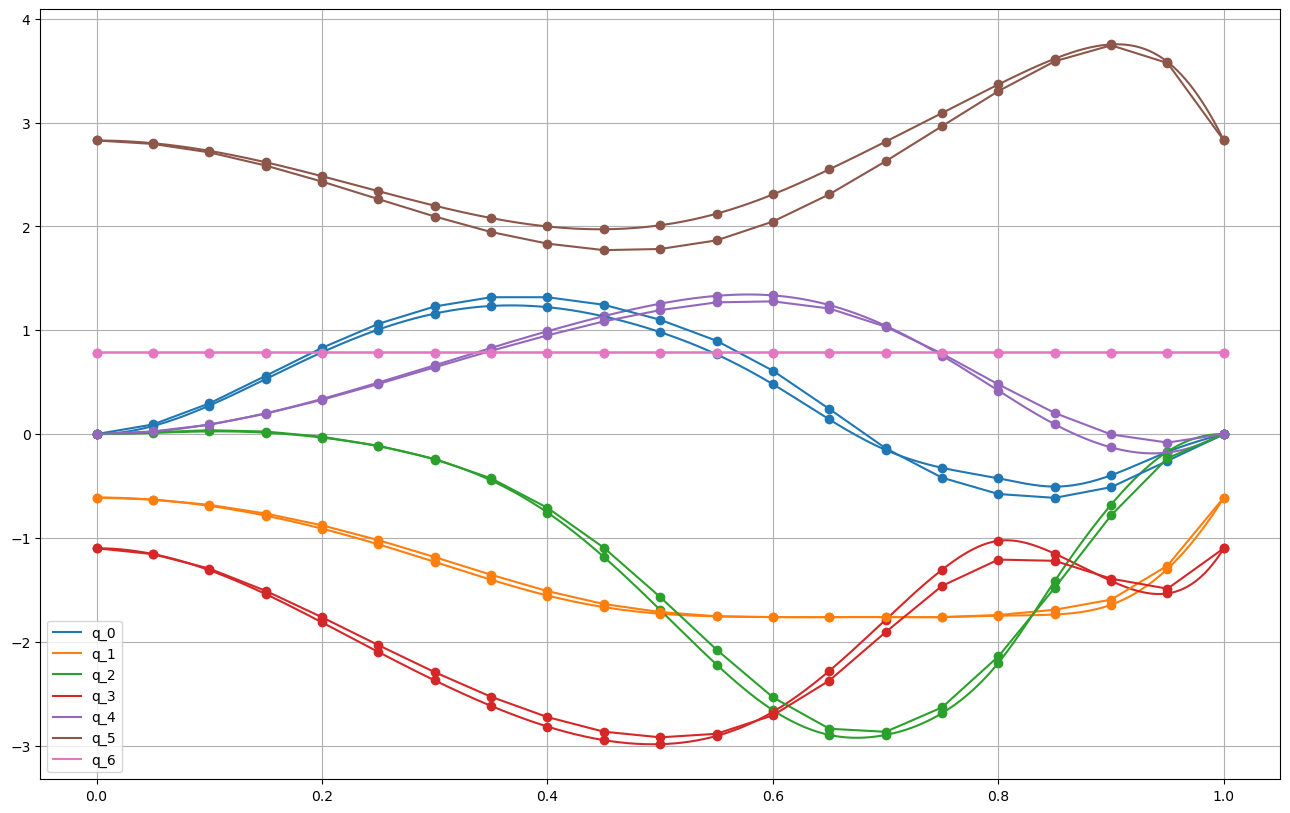

In [68]:
panda_results_plot(_results, scheme = _scheme)
plot_init_arrays(_results, waypoints=_waypoints)

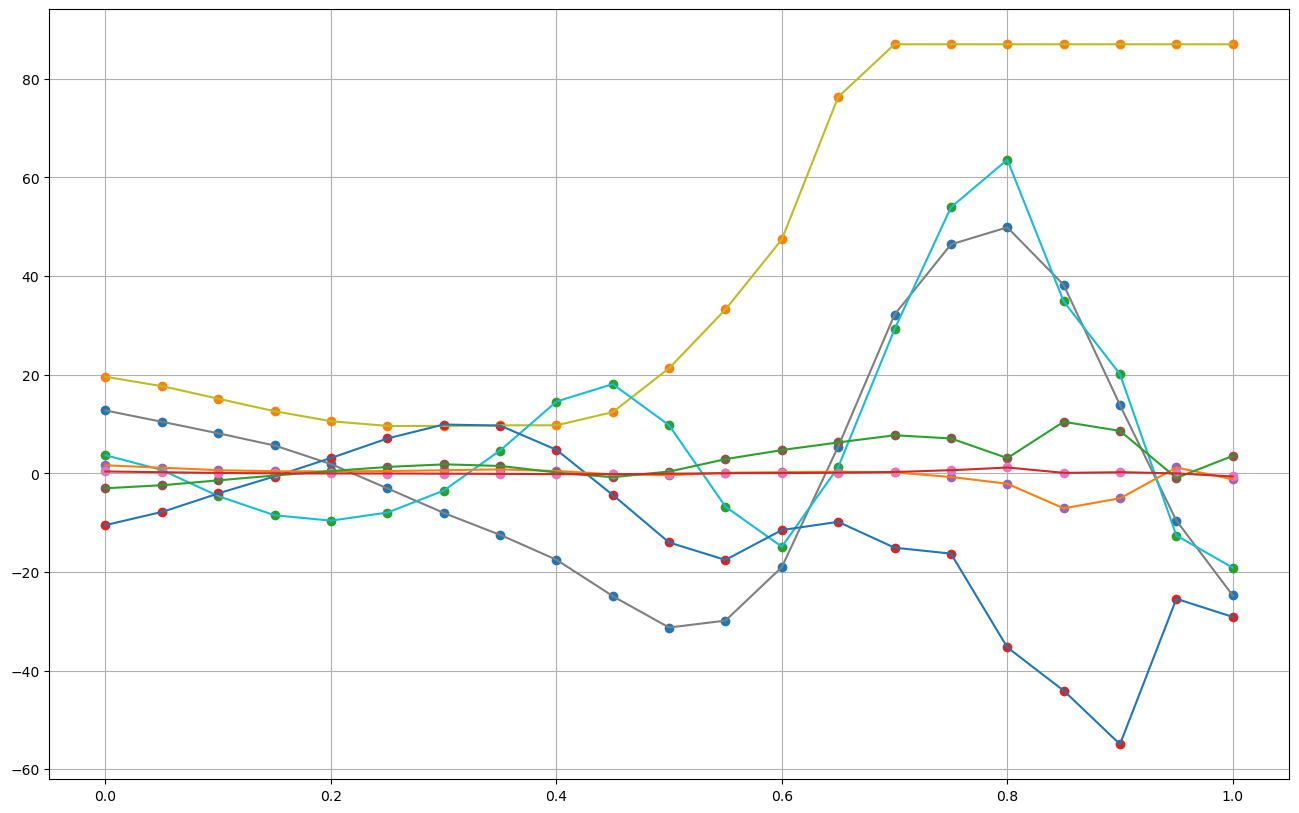

In [69]:
panda_results_plot_u(_results, scheme = _scheme, n_graph = 2000)

In [70]:
jacmat = panda.jacob0(q = _results['q'][-1,:], half = 'trans')
v_eff_cart_e = jacmat@_results['v'][-1,:]
v_eff_cart_e

array([10.,  0.,  0.])

In [71]:
_n_graph = 2000 # A higher number here will provide more exact results but take longer to run
_t_end = 1
t_arr = np.linspace(0,_t_end,_n_graph)
_x_interp, u_interp = panda_interp(_results, _scheme, n_graph = _n_graph)

_q_interp = _x_interp[:,:7]
_v_interp = _x_interp[:,7:]

In [72]:
_v_cart = np.ones([_n_graph, 3])
for ii in range(_n_graph):
    #print('q:',_q_interp[ii,:],'\nv:', _v_interp[ii,:])
    _v_cart[ii,:] = cart_v(_q_interp[ii,:], _v_interp[ii,:])

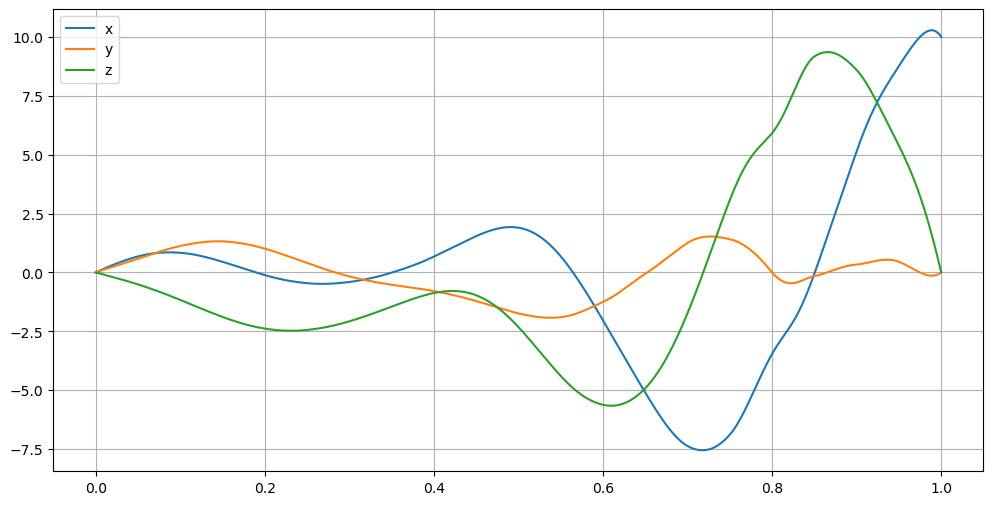

In [73]:
plt.figure(figsize=[12,6])
compon = ['x','y','z']
for ii in range(3):
    plt.plot(t_arr,_v_cart[:,ii], label = compon[ii])
plt.legend()
plt.grid()

_waypoints=get_waypoints(30, _results, _scheme)

In [74]:
_scheme = 'hs_mod'
_N = 15
dynam_g_q, dynam_inv, dynam_f_x = panda_with_mass(0)
_results = panda_throw(
    _scheme,
    _N,
    t_end = 1,
    ini_guess='custom',
    dynam_g_q=dynam_g_q,
    waypoints=_waypoints,
    verbose=True,
    silent=False,
    acc_mult = 0.01,
    u_mult = 0.1,
    v_mult = 0,
    tau_safety_factor = 1., 
    speed_safety_factor = 100.,
    v_x_end = 10,
    v_z_end = 0,
    block_wrist=True
)

Dynamics detected: Function
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:     7581
Number of nonzeros in inequality constraint Jacobian.:     1302
Number of nonzeros in Lagrangian Hessian.............:     5187

Total number of variables............................:     1085
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1014
Total number of inequality constraints...............:     1302
        inequality constraints with only lower bounds:      651
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      651

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  4.8472244e+02 1.20e+02 1.00e+00  -1.0 0.00e

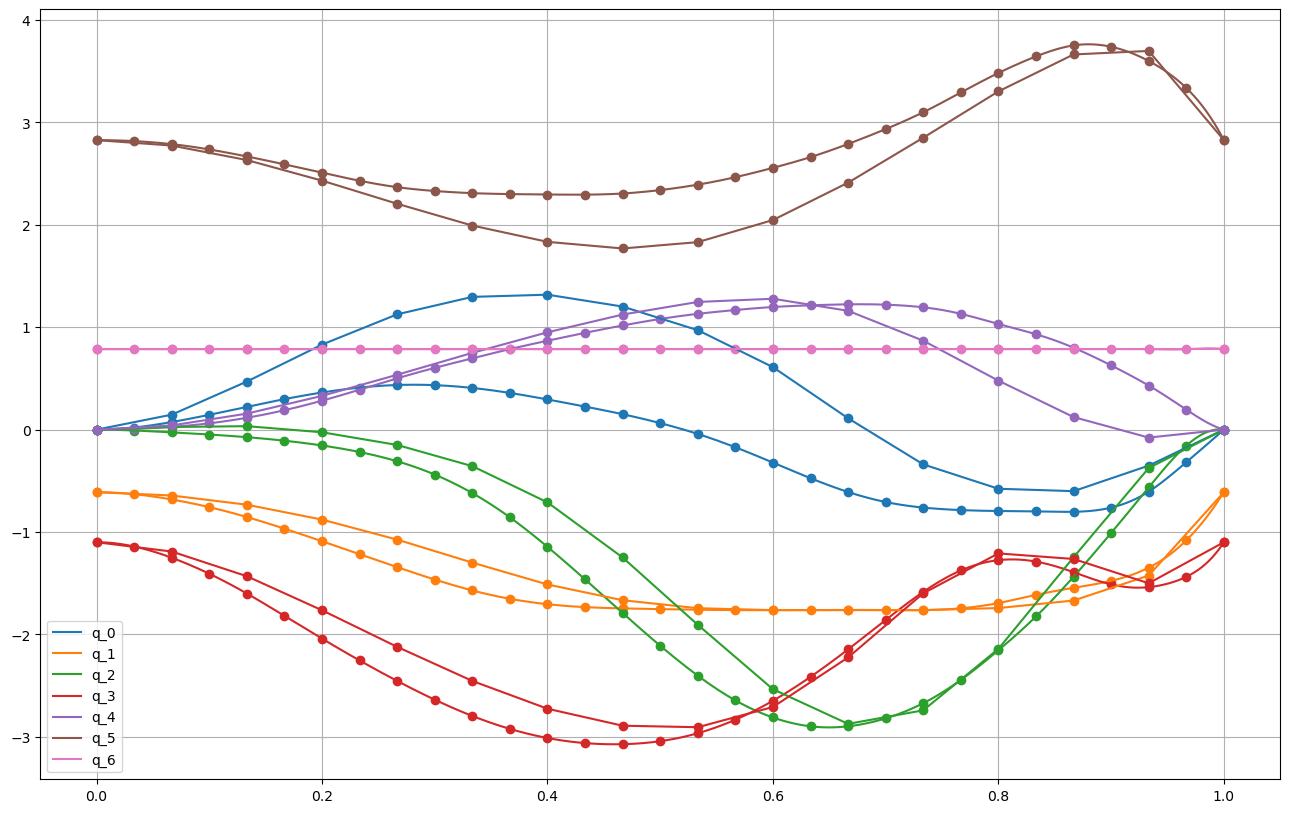

In [75]:
panda_results_plot(_results, scheme = _scheme)
plot_init_arrays(_results, waypoints=_waypoints)

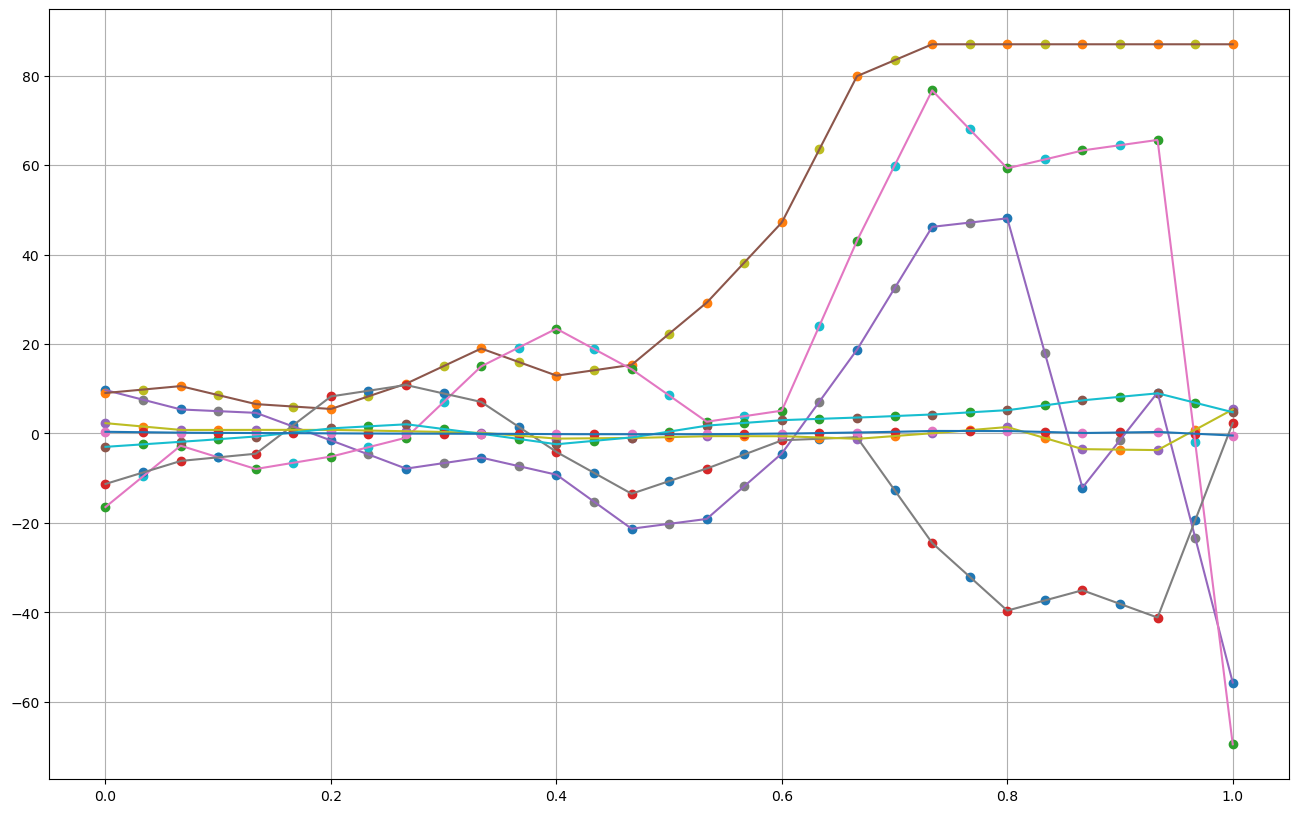

In [76]:
panda_results_plot_u(_results, scheme = _scheme)

In [77]:
_results.keys()

dict_keys(['cpudt', 'iter_count', 'cost', 'opti_stats', 'scheme_mode', 'n_q', 'n_u', 'solve_order', 'params', 'N', 'scheme', 'x', 'x_d', 'x_like_u', 'x_d_like_u', 'u', 'u_like_x', 't', 't_col', 'lam', 'q', 'q_like_u', 'v', 'v_like_u', 'a', 'a_like_u', 'x_c', 'x_d_c', 'u_c', 't_c', 'lam_c', 'q_c', 'v_c', 'a_c'])

In [78]:
_results['cost']

748.4479506276732

In [79]:
_x_interp, u_interp = panda_interp(_results, _scheme, n_graph = _n_graph)
_x_interp[1500,:7]

array([-0.7763284 , -1.75703907, -2.56527917, -1.46590088,  1.16798674,  3.19614162,  0.78539094])

In [80]:
_n_graph = 2000
_x_interp, u_interp = panda_interp(_results, _scheme, n_graph = _n_graph)
cart_tray = tray_nodes(_x_interp[:,:7])

In [81]:
_x_interp_anim, _ = panda_interp(_results, _scheme, n_graph = 200)
np.savetxt('panda_q_traj.txt', _x_interp_anim)
cart_v(_x_interp_anim[-1,:7],_x_interp_anim[-1,7:])

array([ 1.00000000e+01, -5.55111512e-17,  6.66133815e-16])

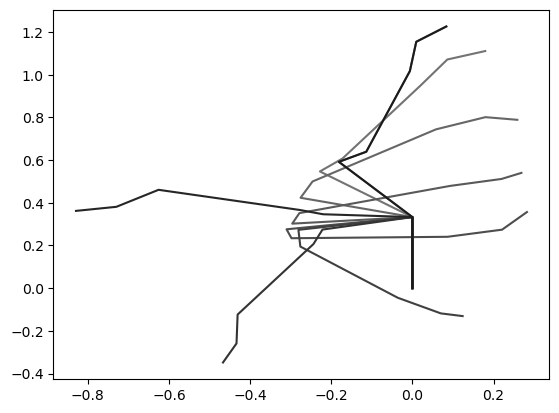

In [82]:
for i in range(0,2000,250):
    _p = i/2000
    _c = 0.5-0.4*_p
    plt.plot(cart_tray[:,i,0],cart_tray[:,i,2], color = str(_c))
plt.plot(cart_tray[:,-1,0],cart_tray[:,-1,2], color = '0.1')

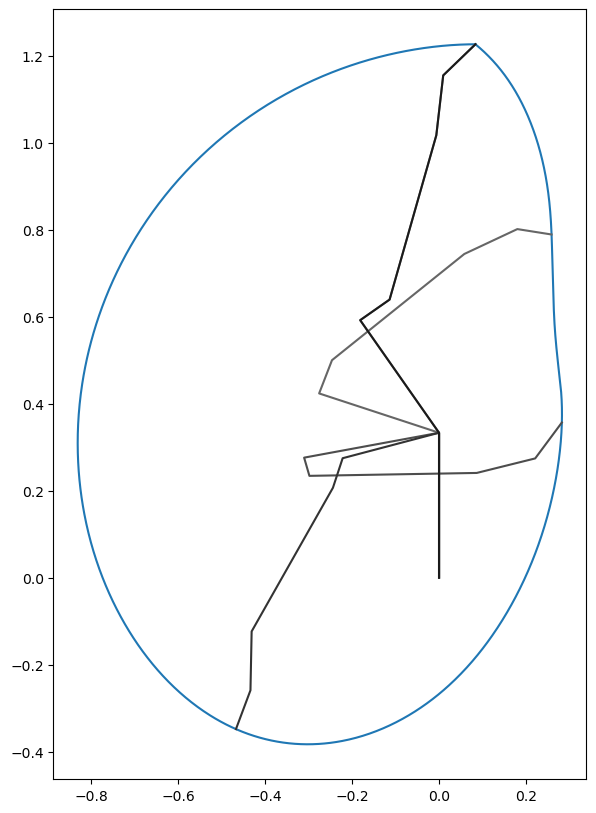

In [83]:
plt.figure(figsize=[10,10])
plt.plot(cart_tray[-1,:,0],cart_tray[-1,:,2])

for i in range(0,2000,500):
    _p = i/2000
    _c = 0.5-0.4*_p
    plt.plot(cart_tray[:,i,0],cart_tray[:,i,2], color = str(_c))
plt.plot(cart_tray[:,-1,0],cart_tray[:,-1,2], color = '0.1')

plt.gca().set_aspect('equal')

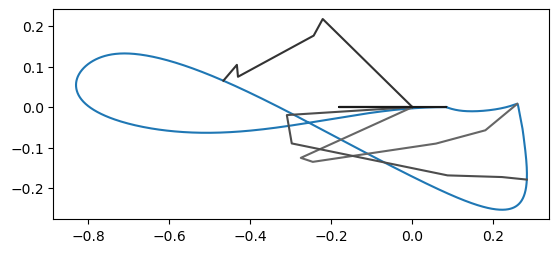

In [84]:
plt.plot(cart_tray[-1,:,0],cart_tray[-1,:,1])

for i in range(0,2000,500):
    _p = i/2000
    _c = 0.5-0.4*_p
    plt.plot(cart_tray[:,i,0],cart_tray[:,i,1], color = str(_c))
plt.plot(cart_tray[:,-1,0],cart_tray[:,-1,1], color = '0.1')

plt.gca().set_aspect('equal')

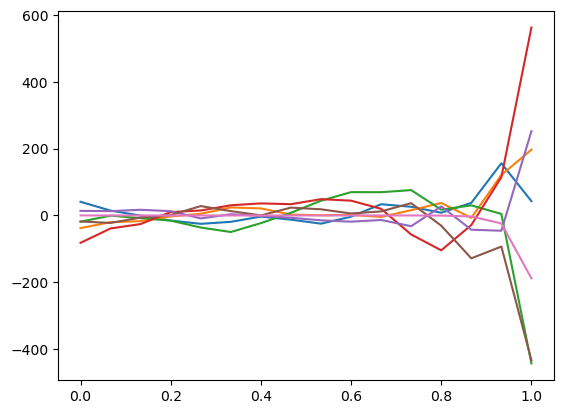

In [85]:
plt.plot(_results['t'],_results['a'])

In [86]:
n_graph = 2000 # A higher number here will provide more exact results but take longer to run
_t_end = 1
t_arr = np.linspace(0,_t_end,n_graph)
if 'parab' in _scheme:
    u_scheme = 'parab'
else:
    u_scheme = 'lin'
    
if 'hs'in _scheme:
        _scheme_params = {'u_c':_results['u_c'],
                      'x_dot_c': _results['x_d_c'],
                      'x_c': _results['x_c']}
else:
    _scheme_params ={}

_dyn_err_q, _dyn_err_v, _, _dyn_err_2 = dynamic_error(
            x_arr=_results['x'],
            u_arr=_results['u'],
            t_end=_t_end,
            params = (),
            F = dynam_f_x_t,
            X_dot=_results['x_d'],
            scheme=_scheme,
            u_scheme=u_scheme,
            scheme_params=_scheme_params,
            n_interp= n_graph)

ValueError: not enough values to unpack (expected 4, got 2)

In [ ]:

colors = [f'C{ii}'for ii in range(10)]
interv_n = (_N * t_arr)/_t_end
plt.figure(figsize=[14,8])
for ii in range(n_q):
    cut_p = 0
    for ll in range(1,_N+1):
        jj = np.searchsorted(interv_n, ll)
        plt.plot(t_arr[cut_p:jj],_dyn_err_2[cut_p:jj,ii], '-', c = colors[ii], label = f'$q_{ii+1}$' if cut_p == 0 else None)
        cut_p = jj
plt.plot(np.linspace(0,_t_end,_N+1), np.zeros(_N+1), 'ok')
    
if 'hs'in _scheme:
    plt.plot(_results['t_c'], np.zeros(_N), 'ow', markeredgecolor='b', label = 'collocation points')
plt.legend()
plt.grid()
#plt.ylim([-0.00001, 0.00001])

plt.title(r'Second order dynamic error $\varepsilon^{[2]}_{q_i}$,'+f'{_scheme} scheme')
plt.xlabel('Time(s)')
plt.ylabel('Dynamic error $(rad/s)$')
plt.tight_layout(pad = 0.0)

In [ ]:

colors = [f'C{ii}'for ii in range(10)]
interv_n = (_N * t_arr)/_t_end
plt.figure(figsize=[14,8])
for ii in range(n_q):
    cut_p = 0
    for ll in range(1,_N+1):
        jj = np.searchsorted(interv_n, ll)
        plt.plot(t_arr[cut_p:jj],np.abs(_dyn_err_2[cut_p:jj,ii]), '-', c = colors[ii], label = f'$q_{ii+1}$' if cut_p == 0 else None)
        cut_p = jj
        
plt.plot(t_arr, arr_sum(_dyn_err_2))
plt.plot(np.linspace(0,_t_end,_N+1), np.zeros(_N+1), 'ok')
    
if 'hs'in _scheme:
    plt.plot(_results['t_c'], np.zeros(_N), 'ow', markeredgecolor='b', label = 'collocation points')
plt.legend()
plt.grid()
#plt.ylim([-0.00001, 0.00001])

plt.title(r'Second order dynamic error $\varepsilon^{[2]}_{q_i}$,'+f'{_scheme} scheme')
plt.xlabel('Time(s)')
plt.ylabel('Dynamic error $(rad/s)$')
plt.tight_layout(pad = 0.0)

## Sistematic comparative

In [ ]:
from chords.util import (sch_to_lab, sch_to_color, sch_to_long_label, scheme_kwargs, oct_fig_size, set_fonts)
set_fonts()

In [ ]:

plt.rcParams.update({'font.size': 15})
oct_fig_size = [10,6]

In [ ]:
# If Loading a saved run:
with open('case8.pkl', 'rb') as f:
    results = pickle.load(f)
schemes = ['trapz', 'trapz_mod', 'hs_parab', 'hs_mod_parab',]

In [ ]:
#schemes = ['hs_parab', 'hs_mod_parab','trapz', 'trapz_mod']#, 'hs', 'hs_mod']
schemes = ['hs_parab', 'hs_mod_parab','trapz', 'trapz_mod']
solve_repetitions = 1
#N_arr = [20, 25, 30, 40, 50, 60, 70, 80, 100, 125, 150, 175, 200]#, 225, 250, 275, 300]
#N_arr = [25, 50, 75, 100, 150, 200, 250, 300]
N_arr = [20, 25, 30, 40, 50, 60, 80, 100, 120, 160, 200]
#N_arr = [20, 35, 50, 75, 100, 130, 160, 200]
results = {}
end_mass = 0

dynam_g_q, dynam_inv, dynam_f_x = panda_with_mass(end_mass)
for scheme in schemes:
    key = scheme
    print('Problem:', key)
    results[key] = {'N_arr':N_arr}
    for N in N_arr:
        print(f'\tN = {N}')
        results[key][N] = panda_throw(
            scheme,
            N,
            solve_repetitions=solve_repetitions,
            t_end = 1,
            ini_guess='custom',
            dynam_g_q=dynam_g_q,
            waypoints=_waypoints,
            verbose=False,
            silent=True,
            acc_mult = 0.1,
            u_mult = 1,
            v_mult = 0,
            ud_mult = 0,
            tau_safety_factor = 1.5, 
            speed_safety_factor = 100.,
            v_x_end = 10,
            v_z_end = 0,
            block_wrist=False,
            integr_funcs = 'old'
        )

In [ ]:
plt.figure(figsize = [12, 8])
for scheme in schemes:
    key = scheme
    N_arr = results[key]['N_arr']
    
    for N in N_arr:
        
        t_plot = results[key][N]['t']
        q_plot = results[key][N]['q']
        for ii in range(7):
            plt.plot(t_plot, q_plot[:,ii], c = f'C{ii}', alpha = 0.1)
plt.grid()
plt.title('Trajectory Superposition')
#plot_init_arrays(results[key][50], waypoints=_waypoints)

In [ ]:
results.keys()

In [ ]:
_x_interp_anim, _ = panda_interp(results['hs_mod_parab'][50], 'hs_mod_parab', n_graph = 200)
np.savetxt('panda_q_traj.txt', _x_interp_anim)

In [ ]:
plt.figure(figsize = [12, 8])
for scheme in schemes:
    key = scheme
    N_arr = results[key]['N_arr']
    
    for N in N_arr:
        
        t_plot = results[key][N]['t']
        q_plot = results[key][N]['v']
        for ii in range(7):
            plt.plot(t_plot, q_plot[:,ii], c = f'C{ii}', alpha = 0.1)
plt.grid()
plt.title('Trajectory Superposition')

In [ ]:
plt.figure(figsize = [12, 8])
for scheme in schemes:
    key = scheme
    N_arr = results[key]['N_arr']
    
    for N in N_arr:
        
        t_plot = results[key][N]['t']
        q_plot = results[key][N]['u']
        for ii in range(7):
            plt.plot(t_plot, q_plot[:,ii], c = f'C{ii}', alpha = 0.1)
plt.grid()
plt.title('Trajectory Superposition')

In [ ]:
key = 'hs_parab'
panda_results_plot(results[key][50], key)
#plot_init_arrays(_results, waypoints=_waypoints)

In [ ]:
from chords.piecewise import integrate_rk4

In [ ]:
def integrate_rk4_u(results, scheme, n_graph = 2000):
    
    t_end = results['t'][-1]
    t_arr = np.linspace(0,t_end,n_graph)
    N = results['x'].shape[0]-1
    
    if 'hs'in scheme:
        scheme_params = {'u_c':results['u_c'],
                      'x_dot_c': results['x_d_c'],
                      'x_c': results['x_c']}
    else:
        scheme_params ={}

    x_int, u_int = interpolated_array(
        X = results['x'],
        U = results['u'],
        h = t_end/N,
        t_array= t_arr,
        params=(),
        X_dot=results['x_d'],
        scheme=scheme,
        u_scheme='lin',
        scheme_params=scheme_params,
    )
    
    dt = t_end/(n_graph-1)
    x_0 = results['x'][0,:]
    x_int = integrate_rk4(x_0, u_int, dynam_f_x_np, dt, ())
    return x_int

In [ ]:
from chords.piecewise import (trapz_accel_restr, trapz_mod_accel_restr, 
                             hs_accel_restr, hs_mod_accel_restr)

In [ ]:
rest_dic = {
    'hs_parab':hs_accel_restr,
    'hs_mod_parab':hs_accel_restr,
    'trapz':trapz_accel_restr,
    'trapz_mod':trapz_mod_accel_restr,
    'hs':hs_accel_restr,
    'hs_mod':hs_mod_accel_restr
}

In [ ]:
def scheme_error(results, scheme):
    restr = rest_dic[scheme]
    x_arr = results['x']
    a_arr = results['a']
    t_end = results['t'][-1]
    N = results['x'].shape[0]-1
    dt = t_end/N
        
    error = np.ones([N,n_q*2])
    
    for ii in range(N):
        
        x = x_arr[ii,:]
        x_n = x_arr[ii+1,:]
        a = a_arr[ii,:]
        a_n = a_arr[ii+1,:]
        
        if 'hs'in scheme:
            scheme_params = results['a_c'][ii,:]
        else:
            scheme_params = []
        error[ii,:] = restr(x, x_n, a, a_n, dt, scheme_params)
    return error

In [ ]:
key = 'hs_mod_parab'
N = 25
n_graph = 2000
results[key][N].keys()

In [ ]:
_sch_err = scheme_error(results[key][N], key)

In [ ]:
results[key][N]['t']

In [ ]:

N = 25
t_i = (results[key][N]['t'][1:] + results[key][N]['t'][:-1])/2
for key in schemes:
    plt.figure(figsize=[6,2])
    _sch_err = scheme_error(results[key][N], key)
    plt.plot(t_i,_sch_err)
    plt.title(f'scheme error: {key}')

N = 15

_ = plt.plot(results['hs_parab'][N]['x']-results['hs_mod_parab'][N]['x'],'.')

_ = plt.plot(results['hs_parab'][N]['x']-results['hs'][N]['x'],'.')

_ = plt.plot(results['hs_parab'][N]['x'], '.')

_ = plt.plot(results['hs_parab'][N]['t'],results['hs_parab'][N]['a'], '.')
_ = plt.plot(results['hs_parab'][N]['t_c'],results['hs_parab'][N]['x_d_c'][:,n_q:], '.')

In [ ]:
n_graph = 5001
t_end = results[key][N]['t'][-1]
t_arr = np.linspace(0,t_end,n_graph)

In [ ]:
n_graph = 5001 # A higher number here will provide more exact results but take longer to run

for scheme in schemes:
    key = scheme
    if 'parab' in scheme:
        u_scheme = 'parab'
    else:
        u_scheme = 'lin'
    print('Problem:', key)
    N_arr = results[key]['N_arr']
    
    for N in N_arr:
    #for N in [50,100]:    
        print(f'\tN = {N}')
        
        t_end = results[key][N]['t'][-1]
        t_arr = np.linspace(0,t_end,n_graph)
        
        
        if 'hs'in scheme:
            scheme_params = {'u_c':results[key][N]['u_c'],
                          'x_dot_c': results[key][N]['x_d_c'],
                          'x_c': results[key][N]['x_c']}
        else:
            scheme_params ={}
            
        dyn_err_q, dyn_err_v, _, dyn_err_2 = dynamic_error(
            x_arr=results[key][N]['x'],
            u_arr=results[key][N]['u'],
            t_end=results[key][N]['t'][-1],
            params = (),
            F = dynam_f_x_t,
            X_dot=results[key][N]['x_d'],
            scheme = scheme, 
            u_scheme = u_scheme,
            scheme_params= scheme_params,
            n_interp= n_graph)
            
        results[key][N]['dyn_err_q'] = dyn_err_q
        results[key][N]['dyn_err_v'] = dyn_err_v
        results[key][N]['dyn_err_2'] = dyn_err_2

In [ ]:
results[scheme][N]['dyn_err_2'][-1]

In [ ]:
t_arr.shape

In [ ]:
t_points

In [ ]:
del(interv_n)

In [ ]:
#schemes = ['hs', 'hs_mod', 'hs_parab', 'hs_mod_parab', 'trapz', 'trapz_mod']
schemes = ['trapz', 'trapz_mod', 'hs_parab', 'hs_mod_parab', ]

In [ ]:
def total_state_error(t_arr, dyn_err):
    errors = np.trapz(np.abs(dyn_err), t_arr, axis=0)
    return errors

In [ ]:
for scheme in schemes:
    key = scheme
    print('Problem:', key)
    N_arr = results[key]['N_arr']
    for N in N_arr:
        print(f'\tN = {N}')
        for letter in 'qv2':
            results[key][N][f'integ_dyn_err_{letter}']= total_state_error(t_arr, results[scheme][N][f'dyn_err_{letter}'])
            results[key][N][f'module_dyn_err_{letter}']= np.sqrt(np.dot(results[key][N][f'integ_dyn_err_{letter}'], results[key][N][f'integ_dyn_err_{letter}']))
            results[key][N][f'sum_dyn_err_{letter}'] = np.sum(results[key][N][f'integ_dyn_err_{letter}'])

In [ ]:
for scheme in schemes:
    key = scheme
    print('Problem:', key)
    N_arr = results[key]['N_arr']
    
    for letter in 'qv2':
        list_mod = []
        list_sum = []
        for N in N_arr:
            #print(f'\tN = {N}')
            list_mod.append(results[key][N][f'module_dyn_err_{letter}'])
            list_sum.append(results[key][N][f'sum_dyn_err_{letter}'])
        results[key][f'module_dyn_err_{letter}_array'] = np.array(list_mod)
        results[key][f'sum_dyn_err_{letter}_array'] = np.array(list_sum)

In [ ]:
# For each scheme, the number of collocation points can be obtained
for scheme in results.keys():
    if 'hs' in scheme:
        n_coll = np.array(results[scheme]['N_arr'])*2-1
        results[scheme]['N_coll_arr'] = n_coll
    else:
        results[scheme]['N_coll_arr'] = results[scheme]['N_arr']

In [ ]:
results[key][N].keys()

In [ ]:
from chords.util import plot_by_segments

In [ ]:
results[scheme][N]['sum_dyn_err_2']

schemes = ['hs_mod_parab','hs_parab']
N = 25
plot_by_segments(results, schemes, N,
                 thing_to_plot = 'sum_dyn_err_2',
                 title = r'Bipedal walking: Dynamic error $\varepsilon$,'+f' N = {N}',
                 ylabel = 'Dynamic error $(rad/s^2)$')
plt.savefig(f'2d_order/5_link_HS_N{N}_second_order_dynamic_error.eps', format='eps')

In [ ]:
schemes_graph = ['hs_mod_parab','hs_parab']
titles = ['2nd order Hermite Simpson','Hermite Simpson']#, 'Trapezoidal', 'Modified Trapezoidal']
colors = ['b', 'orange', 'g', 'r', 'purple']
funcs = [arr_sum,]#arr_mod,  arr_max
#func_tittles = ['Module of', 'Sum of absolute', 'Maximum of absolute']
y_max_list = [0.12, 0.2, 0.09]
n_int = len(t_arr)
N = 50
#interv_n = (N * t_arr)/results[schemes_graph[0]][N]['t'][-1]
#for ii in range(1):
plt.figure(figsize=oct_fig_size)
for scheme in schemes_graph:
    cut_p = 0
    for ll in results[scheme][N]['t'][1:]:
        jj = np.searchsorted(t_arr, ll, side='left')
        y_plot = funcs[0](results[scheme][N]['dyn_err_2'])
        #print(f'cut_p: {cut_p}, jj: {jj}')
        plt.plot(t_arr[cut_p:jj],
                 y_plot[cut_p:jj],
                 '-', c = sch_to_color(scheme),
                 label = sch_to_lab(scheme) if cut_p == 0 else None)
        cut_p = jj
plt.plot(results[scheme][N]['t'], np.zeros(N+1), 'ok', ms=3, label = 'knot & collocation points')
plt.plot(results[scheme][N]['t_c'], np.zeros(N), 'ow', ms=3, markeredgecolor='k', label = 'collocation points')
plt.legend()
plt.grid()
#plt.ylim([-0.01,y_max_list[ii]])
#plt.xlim([0.6,1])
plt.title(r'Ball throwing: dynamics error $\varepsilon(t)$,'+f' N = {N}')
plt.xlabel('Time(s)')
plt.ylabel('Dynamics error $(rad/s^2)$')
plt.tight_layout(pad = 0.0)
#plt.yscale('log')
    

plt.savefig(f'panda_pics/panda_HS_N50_second_order_dynamic_error.eps', format='eps')

schemes_graph = ['hs_mod_parab','hs_parab']
titles = ['2nd order Hermite Simpson','Hermite Simpson']#, 'Trapezoidal', 'Modified Trapezoidal']
colors = ['b', 'orange', 'g', 'r', 'purple']
funcs = [arr_sum,]#arr_mod,  arr_max
#func_tittles = ['Module of', 'Sum of absolute', 'Maximum of absolute']
y_max_list = [0.12, 0.2, 0.09]
n_int = len(t_arr)
N = 50
#interv_n = (N * t_arr)/results[schemes_graph[0]][N]['t'][-1]
#for ii in range(1):
plt.figure(figsize=oct_fig_size)
for scheme in schemes_graph:
    cut_p = 0
    for ll in range(1,N+1):
        jj = np.searchsorted(interv_n, ll, side='right')
        y_plot = funcs[ii](results[scheme][N]['dyn_err_2'])
        plt.plot(t_arr[cut_p:jj],
                 y_plot[cut_p:jj],
                 '-', c = sch_to_color(scheme),
                 label = sch_to_lab(scheme) if cut_p == 0 else None)
        cut_p = jj
plt.plot(results[scheme][N]['t'], np.zeros(N+1), 'ok', ms=3, label = 'knot & collocation points')
plt.plot(results[scheme][N]['t_c'], np.zeros(N), 'ow', ms=3, markeredgecolor='k', label = 'collocation points')
plt.legend()
plt.grid()
#plt.ylim([-0.01,y_max_list[ii]])
#plt.xlim([0.6,1])
plt.title(r'Ball Throwing: Dynamic error $\varepsilon^{[2]}$,'+f' N = {N}')
plt.xlabel('Time(s)')
plt.ylabel('Dynamic error $(rad/s^2)$')
plt.tight_layout(pad = 0.0)
#plt.yscale('log')
    

#plt.savefig(f'panda_pics/panda_HS_N50_second_order_dynamic_error.pdf', format='pdf')

schemes_graph = ['hs_mod','hs']
titles = ['2nd order Hermite Simpson','Hermite Simpson']#, 'Trapezoidal', 'Modified Trapezoidal']
colors = ['b', 'orange', 'g', 'r', 'purple']
funcs = [arr_sum,]#arr_mod,  arr_max
#func_tittles = ['Module of', 'Sum of absolute', 'Maximum of absolute']
y_max_list = [0.12, 0.2, 0.09]
n_int = len(t_arr)
N = 15
interv_n = (N * t_arr)/results[schemes_graph[0]][N]['t'][-1]
for ii in range(1):
    plt.figure(figsize=oct_fig_size)
    for kk in [1,0]:
        scheme = schemes_graph[kk]
        print(scheme)
        cut_p = 0
        for ll in range(1,N+1):
            jj = np.searchsorted(interv_n, ll)
            y_plot = funcs[ii](results[scheme][N]['dyn_err_2'])
            plt.plot(t_arr[cut_p:jj],y_plot[cut_p:jj], '-', c = f'C{kk}', label = titles[kk] if cut_p == 0 else None)
            cut_p = jj
    plt.plot(results[scheme][N]['t'], np.zeros(N+1), 'ok', label = 'knot & collocation points')
    plt.plot(results[scheme][N]['t_c'], np.zeros(N), 'ow', markeredgecolor='k', label = 'collocation points')
    plt.legend()
    plt.grid()
    #plt.ylim([-0.01,y_max_list[ii]])
    plt.title(r'Second order dynamic error $\varepsilon^{[2]}$,'+f' N = {N}')
    plt.xlabel('Time(s)')
    plt.ylabel('Dynamic error $(rad/s^2)$')
    plt.tight_layout(pad = 0.0)

In [ ]:
schemes_graph = ['trapz', 'trapz_mod']
titles = ['Trapezoidal', '2nd order Trapezoidal']
funcs = [arr_sum,]#arr_mod,  arr_max
y_max_list = [0.12, 0.2, 0.09]
n_int = len(t_arr)
N = 100
interv_n = (N * t_arr)/results[scheme][N]['t'][-1]
for ii in range(1):
    plt.figure(figsize=oct_fig_size)
    for kk in range(2):
        scheme = schemes_graph[kk]
        cut_p = 0
        for ll in range(1,N+1):
            jj = np.searchsorted(interv_n, ll, side='left')
            y_plot = funcs[ii](results[scheme][N]['dyn_err_2'])
            plt.plot(t_arr[cut_p:jj],
                     y_plot[cut_p:jj],
                     '-',
                     c = sch_to_color(scheme),
                     label = sch_to_lab(scheme) if cut_p == 0 else None)
            cut_p = jj
    plt.plot(results[scheme][N]['t'], np.zeros(N+1), 'ok', ms=3, label = 'knot & collocation points')
    plt.legend()
    plt.grid()
    plt.title(r'Ball throwing: dynamics error $\varepsilon(t)$,'+f' N = {N}')
    plt.xlabel('Time(s)')
    plt.ylabel('Dynamics error $(rad/s^2)$')
    plt.tight_layout(pad = 0.0)


plt.savefig(f'panda_pics/panda_trapz_N100_second_order_dynamic_error.eps', format='eps')

# If Loading a saved run:
with open('case8.pkl', 'rb') as f:
    results = pickle.load(f)
    
schemes = ['trapz', 'trapz_mod', 'hs_parab', 'hs_mod_parab']

In [ ]:
schemes = ['trapz', 'trapz_mod', 'hs_parab', 'hs_mod_parab']

In [ ]:
titles = ['Hermite Simpson parab',
          '2nd order Hermite Simpson parab',
          'Trapezoidal',
          '2nd order Trapezoidal',
          'Hermite Simpson',
          '2nd order Hermite Simpson',]
plt.figure(figsize=oct_fig_size)
for ii in range(len(schemes)):
    key = schemes[ii]
    plt.plot(results[key]['N_arr'], results[key][f'sum_dyn_err_2_array'], **scheme_kwargs(key, longlabel=False))
plt.grid()
plt.legend(loc = 'lower left')

plt.yscale('log')
plt.xscale('log')
ticks = np.array(results[key]['N_arr'])
plt.xticks(ticks, labels=ticks)
plt.xlabel('Number of intervals (log scale)')
plt.title(r'Ball throwing: integral dynamics error $\int\varepsilon$')
plt.ylabel('Dynamics error ($rad/s$)')
plt.tight_layout(pad = 0.0)

plt.savefig(f'panda_pics/panda_Sum_second_order_dynamic_error_vs_interval_number.eps', format='eps')

### CPU time, cost and iter count

In [ ]:
for scheme in schemes:
    key = scheme
    print('Problem:', key)
    N_arr = results[key]['N_arr']
    list_cpudt = []
    list_cost = []
    list_iter = []
    for N in N_arr:
        #print(f'\tN = {N}')
        list_cpudt.append(results[key][N]['cpudt'])
        list_cost.append(results[key][N]['cost'])
        list_iter.append(results[key][N]['iter_count'])
    results[key]['cpudt_array'] = np.array(list_cpudt)
    results[key]['cost_array'] = np.array(list_cost)
    results[key]['iter_array'] = np.array(list_iter)

with open('case8.pkl', 'wb') as f:
    pickle.dump(results, f)

In [ ]:
plt.figure(figsize=oct_fig_size)
for ii in range(len(schemes)):
    key = schemes[ii]
    plt.plot(results[key]['N_arr'], results[key]['cpudt_array'], **scheme_kwargs(key, longlabel=False))
plt.grid()
plt.legend()
#plt.yscale('log')
plt.title('Ball throwing: optimization time')
plt.xlabel('Number of intervals')
plt.ylabel('Time (s)')
plt.tight_layout(pad = 0.0)

plt.savefig(f'panda_pics/panda_optim_time_vs_interval_number.eps', format='eps')

In [ ]:
plt.figure(figsize=oct_fig_size)
for ii in range(len(schemes)):
    key = schemes[ii]
    plt.plot(results[key]['cpudt_array'],results[key]['sum_dyn_err_2_array'],**scheme_kwargs(key, longlabel=False))
plt.grid()
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title('Ball throwing Error vs time')
plt.ylabel('Error')
plt.xlabel('Time (s)')
plt.tight_layout(pad = 0.0)

#plt.savefig(f'panda_pics/panda_error_v_time.pdf', format='pdf')

In [ ]:
plt.figure(figsize=oct_fig_size)
for ii in range(len(schemes)):
    key = schemes[ii]
    plt.plot(results[key]['N_arr'], results[key]['iter_array'], **scheme_kwargs(key, longlabel=False))
plt.grid()
plt.legend()
#plt.yscale('log')
plt.title('Optimization iterations')
plt.ylabel('Number of iterations')
plt.xlabel('Number of intervals')
plt.tight_layout(pad = 0.0)

#plt.savefig(f'panda_pics/panda_iter_count_vs_interval_number.pdf', format='pdf')

In [ ]:
plt.figure(figsize=oct_fig_size)
for ii in range(len(schemes)):
    key = schemes[ii]
    plt.plot(results[key]['N_arr'], results[key]['cpudt_array']/results[key]['iter_array'],
             **scheme_kwargs(key, longlabel=False))
plt.grid()
plt.legend()
#plt.yscale('log')
plt.title('Time per iteration')
plt.ylabel('Time per iteration(s)')
plt.xlabel('Number of intervals')
plt.tight_layout(pad = 0.0)

#plt.savefig(f'panda_pics/panda_iter_count_vs_interval_number.pdf', format='pdf')

_t_keys = []
for ii in _results['opti_stats'].keys():
    if ii[0] == 't':
        _t_keys.append(ii)
for ii in _t_keys:
    print(ii.ljust(20), _results['opti_stats'][ii])

In [ ]:
plt.figure(figsize=oct_fig_size)
for ii in [2,3,1,0]:
    key = schemes[ii]
    plt.plot(results[key]['N_arr'], results[key][f'cost_array'], marker = 'o', c = f'C{ii}', label = titles[ii])
plt.grid()
plt.legend()
#plt.yscale('log')
plt.title('Solution Cost')
plt.xlabel('Number of intervals')
plt.ylabel('cost')
plt.tight_layout(pad = 0.0)
#plt.ylim([0, 1100])

In [ ]:
# Here we print the data shown in Table III of the paper

for scheme in ['trapz', 'trapz_mod', 'hs_parab','hs_mod_parab']:
    key = scheme
    #for N in [25,50]:#results[key]['N_arr']:
    if 'hs' in key:
        N = 50
    else:
        N = 100
    print('scheme:', scheme, 'N:', N,'\n\ttime:', results[key][N][f'cpudt'],
              '\n\tErr 1:', results[key][N]['sum_dyn_err_q'], '\n\tErr 2:', results[key][N]['sum_dyn_err_2'])

In [ ]:
results.keys()